In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
from dotenv import load_dotenv
import os

load_dotenv()

password = os.getenv('PG_PASSWORD')


0. Extract data

In [51]:
from sqlalchemy import create_engine

database_name = 'telcom'
table_name= 'xdr_data'

connection_params = { "host": "localhost", "user": "postgres", "password": password,
                    "port": "5432", "database": database_name}

engine = create_engine(f"postgresql+psycopg2://{connection_params['user']}:{connection_params['password']}@{connection_params['host']}:{connection_params['port']}/{connection_params['database']}")

# str or SQLAlchemy Selectable (select or text object)
sql_query = 'SELECT * FROM xdr_data'

df = pd.read_sql(sql_query, con= engine)


1. Data screening

In [7]:
print(df.head())

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

Missing Values

In [9]:
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Descriptive Analysis

In [10]:
df['Handset Type'].describe()

count               149429
unique                1396
top       Huawei B528S-23A
freq                 19752
Name: Handset Type, dtype: object

In [11]:
df['Handset Manufacturer'].describe()

count     149429
unique       170
top        Apple
freq       59565
Name: Handset Manufacturer, dtype: object

In [12]:
df['Dur. (ms).1'].describe()

count    1.500000e+05
mean     1.046091e+08
std      8.103761e+07
min      7.142988e+06
25%      5.744079e+07
50%      8.639998e+07
75%      1.324308e+08
max      1.859336e+09
Name: Dur. (ms).1, dtype: float64

In [13]:
df['Total DL (Bytes)'].describe()

count    1.500000e+05
mean     4.546434e+08
std      2.441429e+08
min      7.114041e+06
25%      2.431068e+08
50%      4.558411e+08
75%      6.657055e+08
max      9.029696e+08
Name: Total DL (Bytes), dtype: float64

In [14]:
df['Total UL (Bytes)'].describe()

count    1.500000e+05
mean     4.112121e+07
std      1.127639e+07
min      2.866892e+06
25%      3.322201e+07
50%      4.114331e+07
75%      4.903424e+07
max      7.833131e+07
Name: Total UL (Bytes), dtype: float64

2. Handling Missing data

In [19]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.prod(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

In [20]:
# percent missing of total data
percent_missing(df)

The dataset contains 12.5 % missing values.


In [22]:
percent_missing(df['Handset Type'])

The dataset contains 0.38 % missing values.


In [24]:
# percent missing of total data
percent_missing(df['Handset Manufacturer'])

The dataset contains 0.38 % missing values.


In [25]:
percent_missing(df['TCP DL Retrans. Vol (Bytes)'])

The dataset contains 58.76 % missing values.


In [26]:
percent_missing(df['TCP UL Retrans. Vol (Bytes)'])

The dataset contains 64.43 % missing values.


In [27]:
percent_missing(df['HTTP DL (Bytes)'])

The dataset contains 54.32 % missing values.


In [39]:
percent_missing(df['Avg RTT DL (ms)'])

The dataset contains 18.55 % missing values.


In [40]:

percent_missing(df['Avg RTT UL (ms)'])

The dataset contains 18.54 % missing values.


2.1 Determine Skewness and decide whether to fill with mean or median

<Axes: >

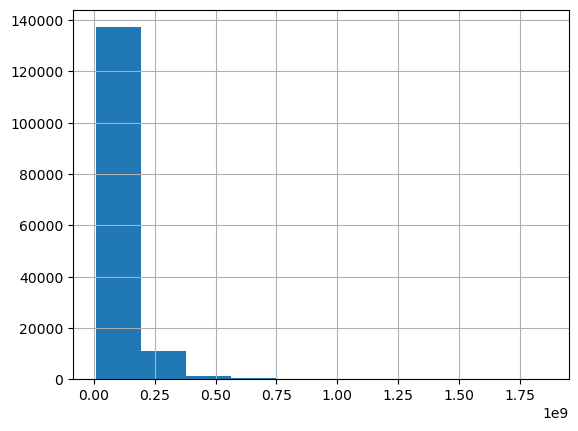

In [29]:
df['Dur. (ms).1'].hist()

<Axes: >

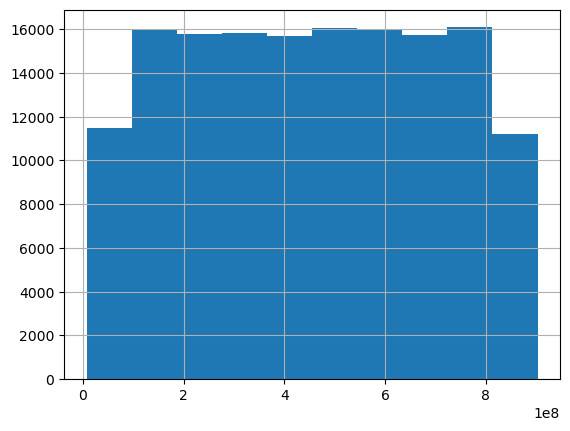

In [30]:
df['Total DL (Bytes)'].hist()

<Axes: >

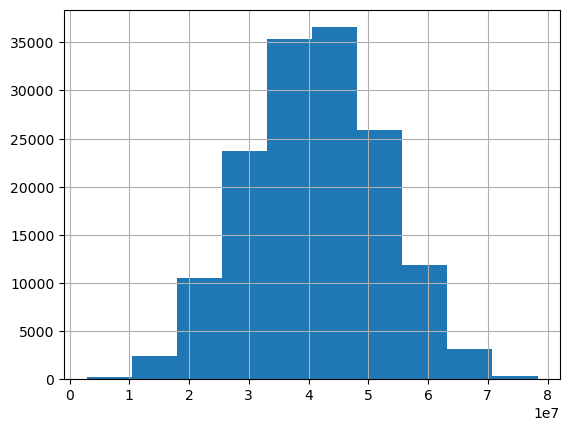

In [31]:
df['Total UL (Bytes)'].hist()

d:\tenx\user-analytics-week1\.conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


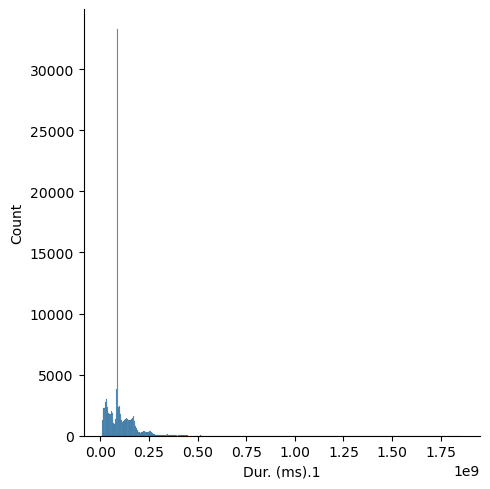

In [38]:
sns.displot(data=df, x=df['Dur. (ms).1'])

In [41]:
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Drop fields with more than 30% missing values

In [44]:
df_clean = df.drop(['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B'], axis=1)
df_clean.shape

(150001, 45)

In [45]:
df_clean.isna().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [49]:
df_clean['Handset Manufacturer'].unique()

array(['Samsung', 'undefined', 'Huawei', 'Apple', 'Zte',
       'TP-Link Technologies Co Ltd', 'Ertebat Hamrah Guya Arvand',
       'Wiko Global Sasu', None, 'TCL Communication Ltd',
       'Oneplus Technology (Shenzhen) Co Ltd', 'Zebra Technologies Corp.',
       'Nokia', 'Wiko', 'Tcl Communication Ltd', 'ZTE', 'Lenovo',
       'Asustek', 'Xiaomi Communications Co Ltd', 'Rim', 'Hmd Global Oy',
       'Sony Mobile Communications AB', 'D-Link Corporation', 'Wct',
       'Dn Electronics', 'Sony Mobile Communications Ab', 'Netgear Inc',
       'Neel Enterprise', 'Teletalk Pvt Ltd', 'DDM Brands LLC',
       'Tp-Link Technologies Co Ltd', 'Sierra Wireless', 'Google Inc',
       'Shenzhen Chainway Information Technology Co Ltd',
       'Microsoft Mobile Oy', 'Htc', 'Crosscall',
       'Shenzhen Kdi Communication Co Ltd',
       'Simcom Wireless Solutions Co Ltd',
       'Qingdao Hisense Communications Co Ltd', 'Lg', 'Archos Sa',
       'Hewlett-Packard', 'Spa Condor Electronics',
       'Son